# 변수중요도 PFI
- PFI(Permutation Feature Imortance)

## 환경준비

In [26]:
# 라이브러리
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn.inspection import per
import warnings
warnings.simplefilter(action='ignore')

In [30]:
data = sns.load_dataset('titanic')
drop_cols = ['age', 'alone', 'alive', 'alive', 'deck', 'adult_male', 'sibsp', 'fare']
data.drop(drop_cols, axis = 1, inplace=True)
data['embarked'].fillna('S', inplace=True)
data.drop('parch', axis = 1, inplace=True)
dumm_cols = ['sex', 'embarked', 'class', 'who', 'embark_town']
data = pd.get_dummies(data, columns=dumm_cols, drop_first=True)

In [31]:
# x, y 분리
target = 'survived'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [32]:
# train, val 분리
from sklearn.model_selection import train_test_split 
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1)

In [33]:
# 가변수화
from sklearn.preprocessing import MinMaxScaler
scalers = MinMaxScaler()
scalers.fit(x_train)
x_train_s = scalers.transform(x_train)
x_val_s = scalers.transform(x_val)

## PFI

### SVM

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

In [ ]:
params = {'C':range(1,7)}
model_svm = GridSearchCV(SVC(), params, cv=10, verbose=2)
model_svm.fit(x_train_s, y_train)

In [36]:
model_svm.cv_results_

{'mean_fit_time': array([0.01052384, 0.00952892, 0.01021421, 0.00957804, 0.01158302,
        0.00959156]),
 'std_fit_time': array([0.00241946, 0.00124876, 0.00259405, 0.00090702, 0.00333601,
        0.00141406]),
 'mean_score_time': array([0.00229318, 0.00232882, 0.00210018, 0.00219939, 0.00225828,
        0.00204084]),
 'std_score_time': array([0.00029983, 0.00043447, 0.00014636, 0.00061426, 0.00023018,
        0.00023996]),
 'param_C': masked_array(data=[1, 2, 3, 4, 5, 6],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1}, {'C': 2}, {'C': 3}, {'C': 4}, {'C': 5}, {'C': 6}],
 'split0_test_score': array([0.82716049, 0.82716049, 0.82716049, 0.82716049, 0.82716049,
        0.82716049]),
 'split1_test_score': array([0.8875, 0.8875, 0.8875, 0.8875, 0.8875, 0.8875]),
 'split2_test_score': array([0.7875, 0.7875, 0.7875, 0.7875, 0.7875, 0.7875]),
 'split3_test_score': array([0.7625, 0.7625, 0.7625, 0.7625, 0.

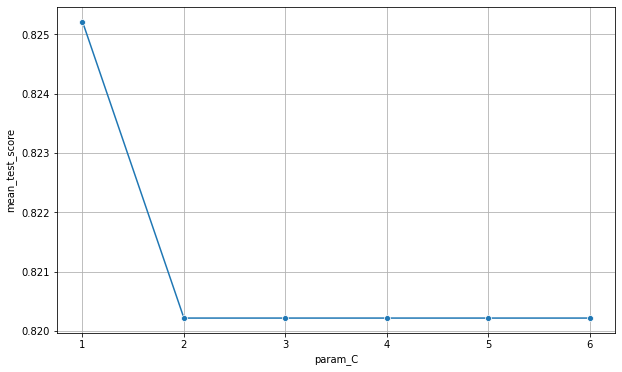

In [37]:
# 튜닝과정 시각화
result = pd.DataFrame(model_svm.cv_results_)

plt.figure(figsize = (10,6))
sns.lineplot(x='param_C', y='mean_test_score', data = result, marker = 'o')
plt.grid()
plt.show()

In [38]:
# 변수 중요도 시각화
from sklearn.inspection import permutation_importance

In [39]:
pfi = permutation_importance(model_svm, x_val_s, y_val, n_repeats=10, scoring='accuracy')

In [40]:
pfi

{'importances_mean': array([ 0.00000000e+00,  4.55555556e-02, -2.22222222e-03,  4.44444444e-03,
         0.00000000e+00,  6.55555556e-02,  1.36666667e-01, -5.55555556e-03,
        -2.22222222e-03,  3.33066907e-17]),
 'importances_std': array([0.        , 0.01527525, 0.00444444, 0.00737028, 0.        ,
        0.02603417, 0.02333333, 0.00555556, 0.00444444, 0.01111111]),
 'importances': array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.03333333,  0.05555556,  0.04444444,  0.05555556,  0.03333333,
          0.07777778,  0.02222222,  0.05555556,  0.03333333,  0.04444444],
        [-0.01111111,  0.        ,  0.        ,  0.        , -0.01111111,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.01111111,  0.        ,  0.        , -0.01111111,  0.01111111,
          0.        ,  0.01111111,  0.01111111,  0.        ,  0.01111111],
        [ 0.    

In [41]:
pfi.importances

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.03333333,  0.05555556,  0.04444444,  0.05555556,  0.03333333,
         0.07777778,  0.02222222,  0.05555556,  0.03333333,  0.04444444],
       [-0.01111111,  0.        ,  0.        ,  0.        , -0.01111111,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.01111111,  0.        ,  0.        , -0.01111111,  0.01111111,
         0.        ,  0.01111111,  0.01111111,  0.        ,  0.01111111],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.05555556,  0.03333333,  0.01111111,  0.06666667,  0.07777778,
         0.06666667,  0.07777778,  0.1       ,  0.06666667,  0.1       ],
       [ 0.15555556,  0.14444444,  0.17777778,  0.13333333,  0.13333333,
         0.08888889,  0.13333333,  0.13333333

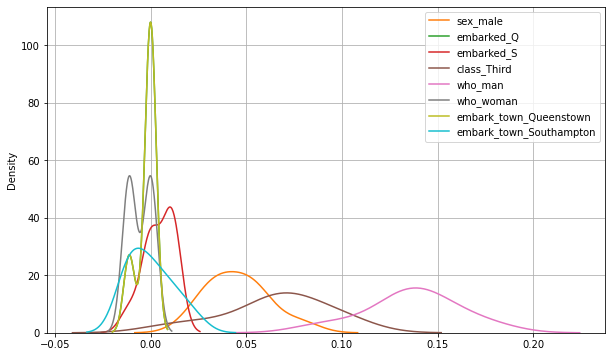

In [42]:
# feature별 Score분포
plt.figure(figsize=(10,6))
for i, var in enumerate(list(x)):
    sns.kdeplot(pfi.importances[i], label = var)
plt.grid()
plt.legend()
plt.show()

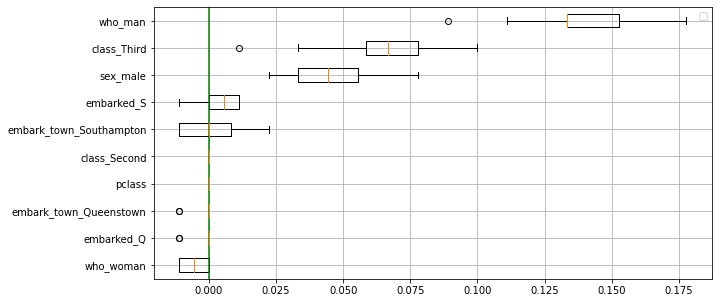

In [44]:
sort_idx = pfi.importances_mean.argsort()
plt.figure(figsize=(10,5))
plt.boxplot(pfi.importances[sort_idx].T, vert=False, labels=x.columns[sort_idx])
plt.axvline(x = 0, color = 'g')
plt.grid()
plt.legend()
plt.show()

In [56]:
# 변수 중요도 plot함수 
def plot_feature_importance(importance, names, topn = 'all'):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('importance')
    plt.ylabel('feature names')
    plt.grid()

    return fi_df

<Figure size 1080x720 with 0 Axes>

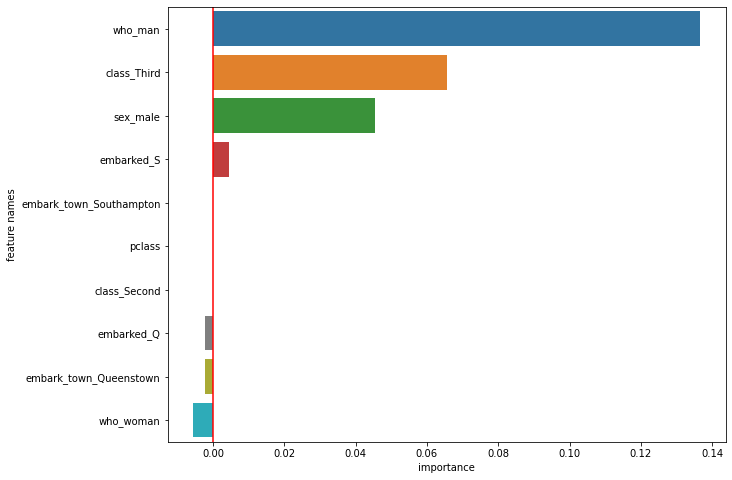

In [63]:
plt.figure(figsize=(15,10))
plot_feature_importance(pfi.importances_mean, list(x_train))
plt.axvline(0, color='r')
plt.grid()
plt.show()